In [1]:
from tensorflow.keras.applications import MobileNetV2, InceptionV3, InceptionResNetV2
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.models import Model
import tensorflow as tf

In [2]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [30]:
model = tf.keras.models.load_model('C:/Users/shiva/OneDrive/Desktop/anpr/models/object_detection.h5')
print('success')

success


In [4]:
path = 'C:/Users/shiva/OneDrive/Desktop/anpr/dataset/5.jpg'
image = load_img(path)
image = np.array(image,dtype=np.uint8)
image1 = load_img(path,target_size=(224.224))
image_arr_224 = img_to_array(image1)/255.0

NameError: name 'np' is not defined

In [31]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

path = 'C:/Users/shiva/OneDrive/Desktop/anpr/dataset/5.jpg'
image = load_img(path)
image = np.array(image, dtype=np.uint8)
image1 = load_img(path, target_size=(224, 224))
image_arr_224 = img_to_array(image1) / 255.0


In [32]:
h,w,d = image.shape
print('height: ',h)
print('width: ',w)

height:  720
width:  1280


In [7]:
plt.imshow(image)
plt.show()

NameError: name 'plt' is not defined

height:  720
width:  1280


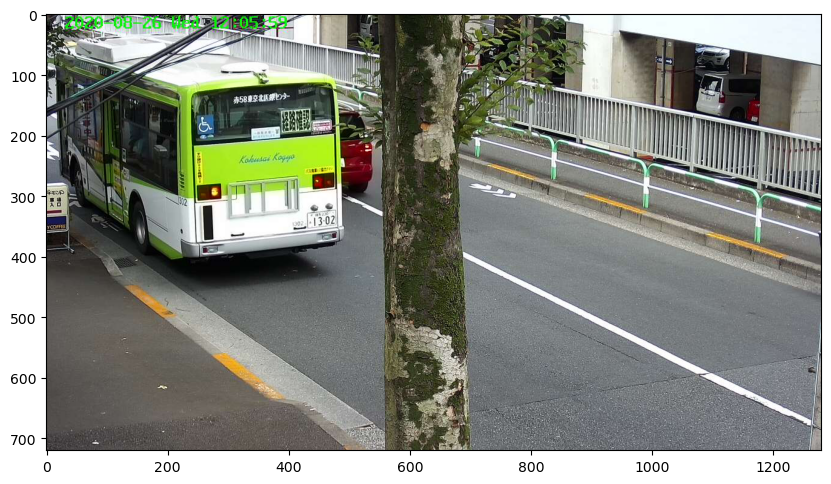

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

path = 'C:/Users/shiva/OneDrive/Desktop/anpr/dataset/5.jpg'
image = load_img(path)
image = np.array(image, dtype=np.uint8)
image1 = load_img(path, target_size=(224, 224))
image_arr_224 = img_to_array(image1) / 255.0
h,w,d = image.shape
print('height: ',h)
print('width: ',w)
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.show()


In [34]:
image_arr_224.shape

(224, 224, 3)

In [35]:
test_arr = image_arr_224.reshape(1,224,224,3)
test_arr.shape

(1, 224, 224, 3)

In [36]:
coords = model.predict(test_arr)
coords

1/1 [==============================] - 5s 5s/step


array([[0.33949816, 0.38511342, 0.4699871 , 0.49698144]], dtype=float32)

In [37]:
denorm = np.array([w,w,h,h])
coords = coords*denorm
coords

array([[434.55764771, 492.94517517, 338.39070797, 357.82663822]])

In [38]:
coords=coords.astype(np.int32)
coords

array([[434, 492, 338, 357]])

(434, 338) (492, 357)


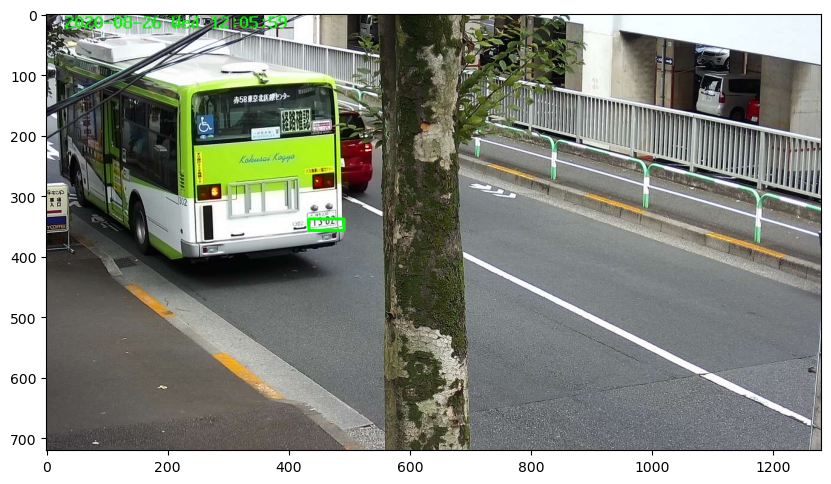

In [39]:
xmin, xmax, ymin, ymax = coords[0]
pt1 = (xmin, ymin)
pt2 = (xmax, ymax)
print(pt1,pt2)
import cv2
# Draw a rectangle on the image
cv2.rectangle(image, pt1, pt2, (0, 255, 0), 3)

# Display the image with the rectangle
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.show()

In [40]:
path = 'C:/Users/shiva/OneDrive/Desktop/anpr/dataset/5.jpg'

def object_detection(path):

    image = load_img(path)
    image = np.array(image, dtype=np.uint8)
    image1 = load_img(path, target_size=(224, 224))
    image_arr_224 = img_to_array(image1) / 255.0
    h,w,d = image.shape
    test_arr = image_arr_224.reshape(1,224,224,3)
    test_arr.shape
    coords = model.predict(test_arr)
    coords
    denorm = np.array([w,w,h,h])
    coords = coords*denorm
    coords
    coords=coords.astype(np.int32)
    coords
    xmin, xmax, ymin, ymax = coords[0]
    pt1 = (xmin, ymin)
    pt2 = (xmax, ymax)
    print(pt1,pt2)
    import cv2
    # Draw a rectangle on the image
    cv2.rectangle(image, pt1, pt2, (0, 255, 0), 3)
    return image, coords

1/1 [==============================] - 0s 236ms/step
(594, 293) (677, 323)


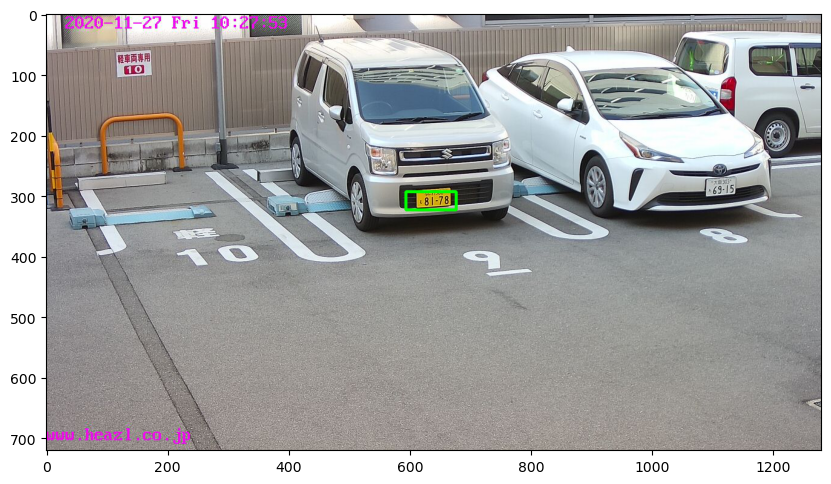

In [41]:
path='C:/Users/shiva/OneDrive/Desktop/anpr/dataset/134.jpg'
image,cods = object_detection(path)


plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.show()

In [42]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

def object_detection(input_path, output_path):
    model_path = "C:/Users/shiva/OneDrive/Desktop/anpr/models/object_detection.h5"
    model = load_model(model_path)

   
    image_files = os.listdir(input_path)
    for file_name in image_files:
        if file_name.endswith('.jpg'):
            image_path = os.path.join(input_path, file_name)
            
            image = load_img(image_path)
            image = np.array(image, dtype=np.uint8)
            image1 = load_img(image_path, target_size=(224, 224))
            image_arr_224 = img_to_array(image1) / 255.0
            h, w, d = image.shape
            test_arr = image_arr_224.reshape(1, 224, 224, 3)
            coords = model.predict(test_arr)
            denorm = np.array([w, w, h, h])
            coords = coords * denorm
            coords = coords.astype(np.int32)
            xmin, xmax, ymin, ymax = coords[0]
            pt1 = (xmin, ymin)
            pt2 = (xmax, ymax)
            
            cv2.rectangle(image, pt1, pt2, (0, 255, 0), 3)
            
            output_image_path = os.path.join(output_path, file_name)
            cv2.imwrite(output_image_path, image)

input_folder = 'C:/Users/shiva/OneDrive/Desktop/anpr/dataset'
output_folder = 'C:/Users/shiva/OneDrive/Desktop/anpr/output'

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

object_detection(input_folder, output_folder)


1/1 [==============================] - 0s 221ms/step
